In [ ]:
import pandas as pd
import numpy as np
from sklearn import metrics
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
dataset=pd.read_csv('BRITANNIA.csv')

In [ ]:
dataset.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,BRITANNIA,EQ,703.25,705.0,759.50,705.0,758.0,756.90,741.01,7512,5.566488e+11,NaN,NaN,NaN
1,2000-01-04,BRITANNIA,EQ,756.90,710.0,770.00,710.0,740.0,754.55,742.52,8135,6.040391e+11,NaN,NaN,NaN
2,2000-01-05,BRITANNIA,EQ,754.55,755.0,759.00,705.0,740.0,735.30,739.92,6095,4.509784e+11,NaN,NaN,NaN
3,2000-01-06,BRITANNIA,EQ,735.30,740.0,794.15,740.0,770.0,785.65,788.83,19697,1.553756e+12,NaN,NaN,NaN
4,2000-01-07,BRITANNIA,EQ,785.65,808.0,848.50,798.0,848.5,848.50,827.53,33107,2.739708e+12,NaN,NaN,NaN


In [ ]:
dataset['Date'] = pd.to_datetime(dataset.Date)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5305 entries, 0 to 5304
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                5305 non-null   datetime64[ns]
 1   Symbol              5305 non-null   object        
 2   Series              5305 non-null   object        
 3   Prev Close          5305 non-null   float64       
 4   Open                5305 non-null   float64       
 5   High                5305 non-null   float64       
 6   Low                 5305 non-null   float64       
 7   Last                5305 non-null   float64       
 8   Close               5305 non-null   float64       
 9   VWAP                5305 non-null   float64       
 10  Volume              5305 non-null   int64         
 11  Turnover            5305 non-null   float64       
 12  Trades              2456 non-null   float64       
 13  Deliverable Volume  4796 non-null   float64     

<Axes: >

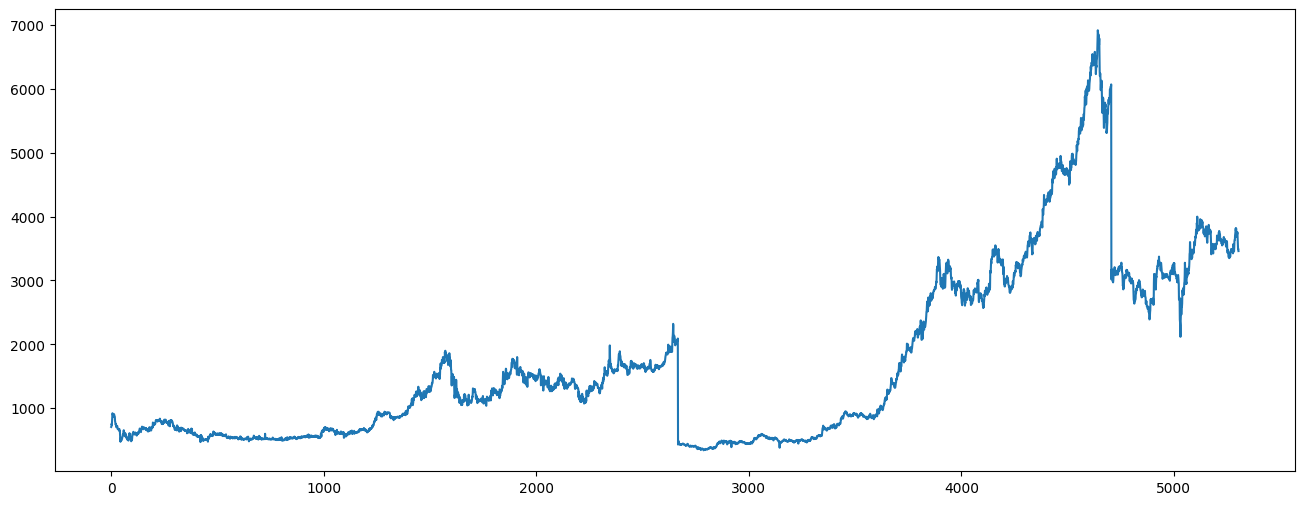

In [ ]:
dataset['Open'].plot(figsize=(16,6))

In [ ]:
X  = dataset[['Open','High','Low','Volume']]
y = dataset['Close']

In [ ]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X ,y , random_state = 0)

In [ ]:
X_train.shape

(3978, 4)

In [ ]:
X_test.shape

(1327, 4)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
regressor = LinearRegression()

In [ ]:
regressor.fit(X_train,y_train)

LinearRegression()

In [ ]:
print(regressor.coef_)

[-3.49655574e-01  6.39626495e-01  7.11116460e-01 -3.71024514e-06]


In [ ]:
print(regressor.intercept_)

-0.6726057250480153


In [ ]:
predicted=regressor.predict(X_test)

In [ ]:
print(X_test)

         Open    High      Low   Volume
5054  3195.00  3205.0  3150.00  1021592
29     710.00   711.0   690.00     7765
5266  3411.80  3450.0  3395.00   383968
3668  1355.70  1390.1  1354.80   114361
3550   858.50   874.0   848.50   246028
...       ...     ...      ...      ...
3597   891.00   915.0   883.35   162368
4055  2685.00  2738.4  2650.20   352945
2799   357.05   363.8   351.65     8252
1953  1415.00  1430.0  1399.50   131251
3824  2247.00  2298.0  2196.70    93674

[1327 rows x 4 columns]


In [ ]:
predicted.shape

(1327,)

In [ ]:
dframe=pd.DataFrame(y_test,predicted)

In [ ]:
dfr=pd.DataFrame({'Actual':y_test,'Predicted':predicted})

In [ ]:
print(dfr)

       Actual    Predicted
5054  3165.75  3168.407244
29     690.60   696.487922
5266  3447.95  3425.899681
3668  1381.70  1377.440396
3550   858.30   860.651133
...       ...          ...
3597   891.30   900.604821
4055  2705.75  2695.346702
2799   355.40   357.212477
1953  1401.25  1413.951157
3824  2203.40  2245.274979

[1327 rows x 2 columns]


In [ ]:
dfr.head(25)

,Actual,Predicted
5054,3165.75,3168.407244
29,690.60,696.487922
5266,3447.95,3425.899681
3668,1381.70,1377.440396
3550,858.30,860.651133
4104,2625.45,2628.732327
4081,2682.50,2715.202279
4663,5773.85,5647.083658
1002,685.15,680.338857
666,528.70,525.261409


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
regressor.score(X_test,y_test)

0.9998444620186313

In [ ]:
import math

In [ ]:
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,predicted))

Mean Absolute Error: 9.840930238738656


In [ ]:
print('Mean Squared  Error:',metrics.mean_squared_error(y_test,predicted))

Mean Squared  Error: 286.5273517273158


In [ ]:
print('Root Mean Squared Error:',math.sqrt(metrics.mean_squared_error(y_test,predicted)))

Root Mean Squared Error: 16.927118825344017


In [ ]:
graph=dfr.head(20)

<Axes: >

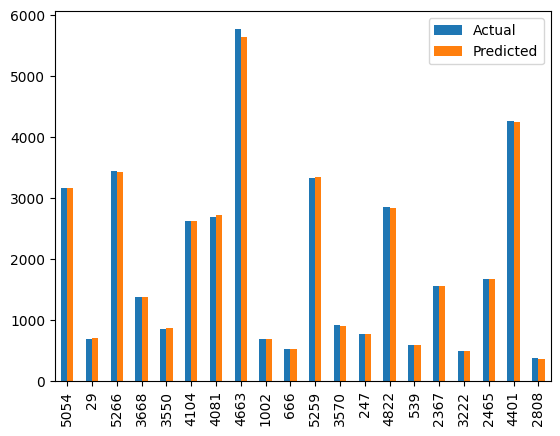

In [ ]:
graph.plot(kind='bar')

In [ ]:
import seaborn as sns

<Axes: >

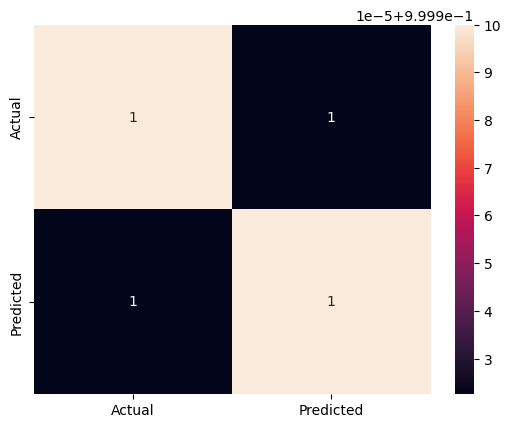

In [ ]:
corr=dfr.corr()
sns.heatmap(corr,annot=True)

In [ ]:
dfr[['Open','High','Low','Last','Close']].plot(kind='box')

KeyError: ignored